# generate sinus data

In [1]:
using Distributions, Plots, LinearAlgebra, DataFrames, CSV, Random, MLJ

In [2]:
n = 20_000
Random.seed!(42)

Q_X = Uniform(-1,1)
Q_Y(x) = MixtureModel([Normal(x + sin(x / .15), 0.1), 
                     Normal(x - sin(x / .15), 0.1)])

X = rand(Q_X, n)
Y = rand.(Q_Y.(X))
df = DataFrame(X = X, Y = Y)

run(`mkdir -p exported_splits`)
run(`mkdir -p exported_splits/sinus`)
# Generate and save 20 random splits:
for i = 0:19
    # same split ratio as on the uci regression benchmark:
    # train, valid, test = .9 * 4/5, .9 * 1/5, .1
    train, valid, test = partition(df, .9 * 4/5, .9 * 1/5, shuffle = true) 
    
    # save to csv
    split_path = joinpath("exported_splits", "sinus", "split_$i")
    run(`mkdir -p $split_path`)
    
    @info CSV.write(joinpath(split_path, "X_train.csv"), train[:, [:X]])
    @info CSV.write(joinpath(split_path, "X_validation.csv"), valid[:, [:X]])
    @info CSV.write(joinpath(split_path, "X_test.csv"), test[:, [:X]])
    @info CSV.write(joinpath(split_path, "y_train.csv"), train[:, [:Y]])
    @info CSV.write(joinpath(split_path, "y_validation.csv"), valid[:, [:Y]])
    @info CSV.write(joinpath(split_path, "y_test.csv"), test[:, [:Y]])
end

[ Info: exported_splits/sinus/split_0/X_train.csv
[ Info: exported_splits/sinus/split_0/X_validation.csv
[ Info: exported_splits/sinus/split_0/X_test.csv
[ Info: exported_splits/sinus/split_0/y_train.csv
[ Info: exported_splits/sinus/split_0/y_validation.csv
[ Info: exported_splits/sinus/split_0/y_test.csv
[ Info: exported_splits/sinus/split_1/X_train.csv
[ Info: exported_splits/sinus/split_1/X_validation.csv
[ Info: exported_splits/sinus/split_1/X_test.csv
[ Info: exported_splits/sinus/split_1/y_train.csv
[ Info: exported_splits/sinus/split_1/y_validation.csv
[ Info: exported_splits/sinus/split_1/y_test.csv
[ Info: exported_splits/sinus/split_2/X_train.csv
[ Info: exported_splits/sinus/split_2/X_validation.csv
[ Info: exported_splits/sinus/split_2/X_test.csv
[ Info: exported_splits/sinus/split_2/y_train.csv
[ Info: exported_splits/sinus/split_2/y_validation.csv
[ Info: exported_splits/sinus/split_2/y_test.csv
[ Info: exported_splits/sinus/split_3/X_train.csv
[ Info: exported_splits/si

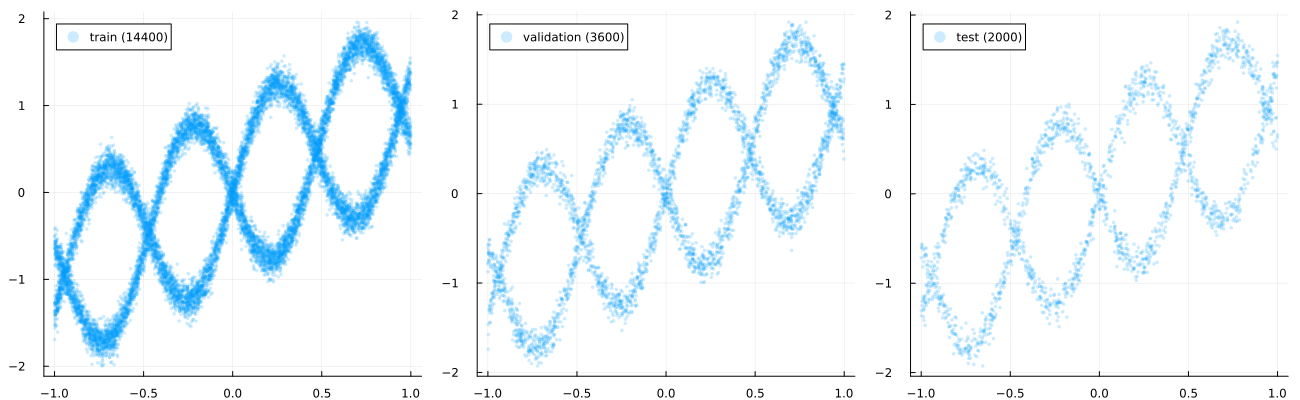

In [3]:
# plot first split
fn = "exported_splits/sinus/split_0/"
X_train = CSV.read(fn * "X_train.csv", DataFrame).X
y_train = CSV.read(fn * "y_train.csv", DataFrame).Y
X_validation = CSV.read(fn * "X_validation.csv", DataFrame).X
y_validation = CSV.read(fn * "y_validation.csv", DataFrame).Y
X_test = CSV.read(fn * "X_test.csv", DataFrame).X
y_test = CSV.read(fn * "y_test.csv", DataFrame).Y

plot(
    scatter(X_train, y_train, lab = "train ($(length(y_train)))"),
    scatter(X_validation, y_validation, lab = "validation ($(length(y_validation)))"),
    scatter(X_test, y_test, lab = "test ($(length(y_test)))"),
    layout = (1, 3), size = (1300, 400), ms = 2, markerstrokewidth = 0, markeralpha = .2
    )